In [ ]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
import time
import datetime
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import make_scorer
from sklearn.metrics import f1_score

def display(results):
    print(f'Best parameters are: {results.best_params_}')
    print("\n")
    mean_score = results.cv_results_['mean_test_score']
    std_score = results.cv_results_['std_test_score']
    params = results.cv_results_['params']
    for mean,std,params in zip(mean_score,std_score,params):
        print(f'f1: {round(mean,3)} + or -{round(std,3)} for the {params}')
        
param_grid = { 
    'n_estimators': [100,200, 500],
    'max_depth' : [32,64,128],
    'criterion' :['gini']
}

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/dataset9.csv')

df = df.reset_index(drop = True)
train_target = df['status']
df = df.drop(columns = ['status','Unnamed: 0','observation_id','president_Trump','season_spring','season_summer','season_winter','protocol_BOOVE','protocol_DALL8','protocol_GARL8','protocol_GARL9','protocol_MRSSH2','protocol_ZROBA1'])


In [ ]:
train_x, test_x, train_y, test_y = train_test_split(df, train_target,
test_size=0.2, random_state = 10,shuffle = True)

train_x_sorted = train_x.sort_index()
train_y_sorted = train_y.sort_index()
test_x_sorted = test_x.sort_index()
test_y_sorted = test_y.sort_index()
test_y_array = test_y_sorted.to_numpy()

rf = RandomForestClassifier(random_state=1,max_depth=128, n_estimators=500) 

rf.fit(df,train_target)
'''
target_predicted = rf.predict(test_x_sorted)

conf_mat = confusion_matrix(test_y_sorted.to_numpy(), target_predicted)
precision = conf_mat[0][0]/(conf_mat[0][0]+conf_mat[0][1])
recall = conf_mat[0][0]/(conf_mat[0][0]+conf_mat[1][0])

f1 = conf_mat[0][0]/(conf_mat[0][0]+1/2*(conf_mat[0][1]+conf_mat[1][0]))
f11 = 2*precision*recall/(precision+recall)
accuracy = (conf_mat[0][0] + conf_mat[1][1])/(conf_mat[0][0] + conf_mat[1][1]+conf_mat[0][1] + conf_mat[1][0])
accuracy, f1
'''

'\ntarget_predicted = rf.predict(test_x_sorted)\n\nconf_mat = confusion_matrix(test_y_sorted.to_numpy(), target_predicted)\nprecision = conf_mat[0][0]/(conf_mat[0][0]+conf_mat[0][1])\nrecall = conf_mat[0][0]/(conf_mat[0][0]+conf_mat[1][0])\n\nf1 = conf_mat[0][0]/(conf_mat[0][0]+1/2*(conf_mat[0][1]+conf_mat[1][0]))\nf11 = 2*precision*recall/(precision+recall)\naccuracy = (conf_mat[0][0] + conf_mat[1][1])/(conf_mat[0][0] + conf_mat[1][1]+conf_mat[0][1] + conf_mat[1][0])\naccuracy, f1\n'

In [ ]:
# predictions for test_observations.csv and generating submissions
df_sub = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/dataset-test9.csv')
final = df_sub[['observation_id','hour']] 

df_sub = df_sub.drop(columns=['Unnamed: 0','observation_id'])
submission = rf.predict(df_sub)
df_sub['submission'] = submission
df_sub['status'] = pd.Series(np.where(df_sub.submission.values == 1, "OPEN", "CLSD"),df_sub.index)
final['status'] = df_sub['status']
final = final.drop(columns=['hour'])

final.to_csv('/content/drive/MyDrive/Colab Notebooks/submission_final1.csv')

In [ ]:
cv = GridSearchCV(rf, param_grid, cv=5,scoring ='f1') #hyperparameters tuning
cv.fit(train_x_sorted, train_y_sorted)
display(cv)

Best parameters are: {'criterion': 'gini', 'max_depth': 128, 'n_estimators': 500}


f1: 0.789 + or -0.052 for the {'criterion': 'gini', 'max_depth': 32, 'n_estimators': 100}
f1: 0.793 + or -0.056 for the {'criterion': 'gini', 'max_depth': 32, 'n_estimators': 200}
f1: 0.792 + or -0.058 for the {'criterion': 'gini', 'max_depth': 32, 'n_estimators': 500}
f1: 0.79 + or -0.058 for the {'criterion': 'gini', 'max_depth': 64, 'n_estimators': 100}
f1: 0.797 + or -0.058 for the {'criterion': 'gini', 'max_depth': 64, 'n_estimators': 200}
f1: 0.797 + or -0.061 for the {'criterion': 'gini', 'max_depth': 64, 'n_estimators': 500}
f1: 0.79 + or -0.058 for the {'criterion': 'gini', 'max_depth': 128, 'n_estimators': 100}
f1: 0.797 + or -0.059 for the {'criterion': 'gini', 'max_depth': 128, 'n_estimators': 200}
f1: 0.797 + or -0.061 for the {'criterion': 'gini', 'max_depth': 128, 'n_estimators': 500}


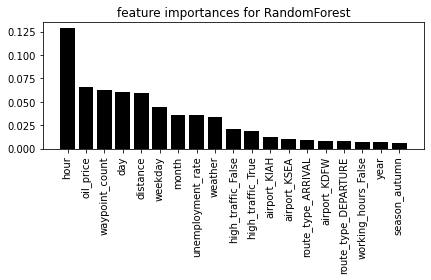

In [ ]:
    df = pd.DataFrame(df)  # presentation only
    importances = rf.feature_importances_
    sorted_indices = np.argsort(importances)[::-1]
    plt.title(f'feature importances for RandomForest')
    plt.bar(range(df.shape[1])[1:20], importances[sorted_indices][1:20], align='center',color="black")
    plt.xticks(range(df.shape[1])[1:20], df.columns[sorted_indices][1:20], rotation=90)
    plt.tight_layout()
    plt.show()